### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
df = pd.read_excel(r"C:\Users\sathi\Downloads\Sample_-_Superstore.xls")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.drop("Row ID",axis=1,inplace=True)

In [5]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.duplicated().sum()
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Structural Errors

In [9]:
df.columns = df.columns.str.replace(" ","_")

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [12]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
numerical = df.select_dtypes(include=["int","float"])
categorical = df.select_dtypes(include="object")

#### Checking the unique value counts

In [14]:
for i in categorical:
    print("*"*10, i, "*"*10)
    print(categorical[i].agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', categorical[i].value_counts())
    print()


********** order_id **********
count                                                   9993
nunique                                                 5009
unique     [CA-2016-152156, CA-2016-138688, US-2015-10896...
Name: order_id, dtype: object
Value Counts: 
 order_id
CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
CA-2016-105732    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: count, Length: 5009, dtype: int64

********** ship_mode **********
count                                                   9993
nunique                                                    4
unique     [Second Class, Standard Class, First Class, Sa...
Name: ship_mode, dtype: object
Value Counts: 
 ship_mode
Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

********** customer_id **********
count                             

#### Checking the statistical measures

In [15]:

for i in numerical:
    print("*"*10, i, "*"*10)
    print(numerical[i].agg(['min', 'max', 'mean', 'median', 'std']))
    print()

********** postal_code **********
min        1040.000000
max       99301.000000
mean      55191.576403
median    56560.000000
std       32065.074478
Name: postal_code, dtype: float64

********** sales **********
min           0.444000
max       22638.480000
mean        229.852846
median       54.480000
std         623.276074
Name: sales, dtype: float64

********** quantity **********
min        1.000000
max       14.000000
mean       3.789753
median     3.000000
std        2.225149
Name: quantity, dtype: float64

********** discount **********
min       0.000000
max       0.800000
mean      0.156188
median    0.200000
std       0.206457
Name: discount, dtype: float64

********** profit **********
min      -6599.978000
max       8399.976000
mean        28.660971
median       8.671000
std        234.271476
Name: profit, dtype: float64



### Univariate Analysis

postal_code       Axes(0.125,0.653529;0.352273x0.226471)
sales          Axes(0.547727,0.653529;0.352273x0.226471)
quantity          Axes(0.125,0.381765;0.352273x0.226471)
discount       Axes(0.547727,0.381765;0.352273x0.226471)
profit                Axes(0.125,0.11;0.352273x0.226471)
dtype: object

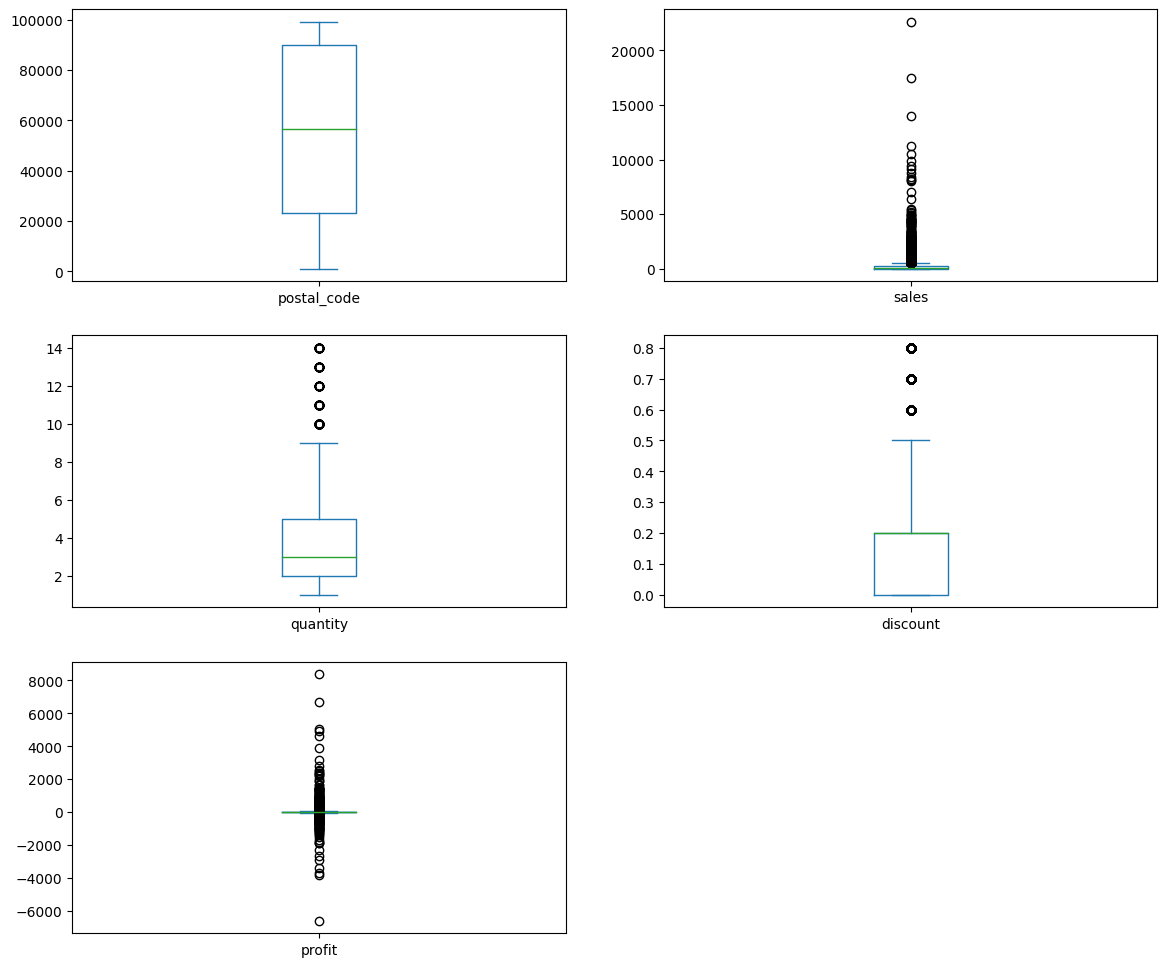

In [16]:
df.plot(kind = "box",subplots = True,layout = (3,2),figsize = (14,12))

### Bivariate Analysis

<Axes: xlabel='category'>

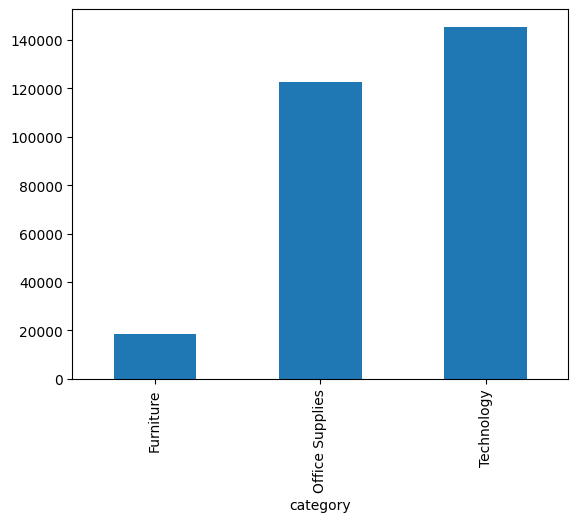

In [17]:
df.groupby(by="category")["profit"].sum().plot.bar()

**Insights from above BarPlot**
1. Furniture have less profits 
2. Technology have more profits

<Axes: xlabel='order_date'>

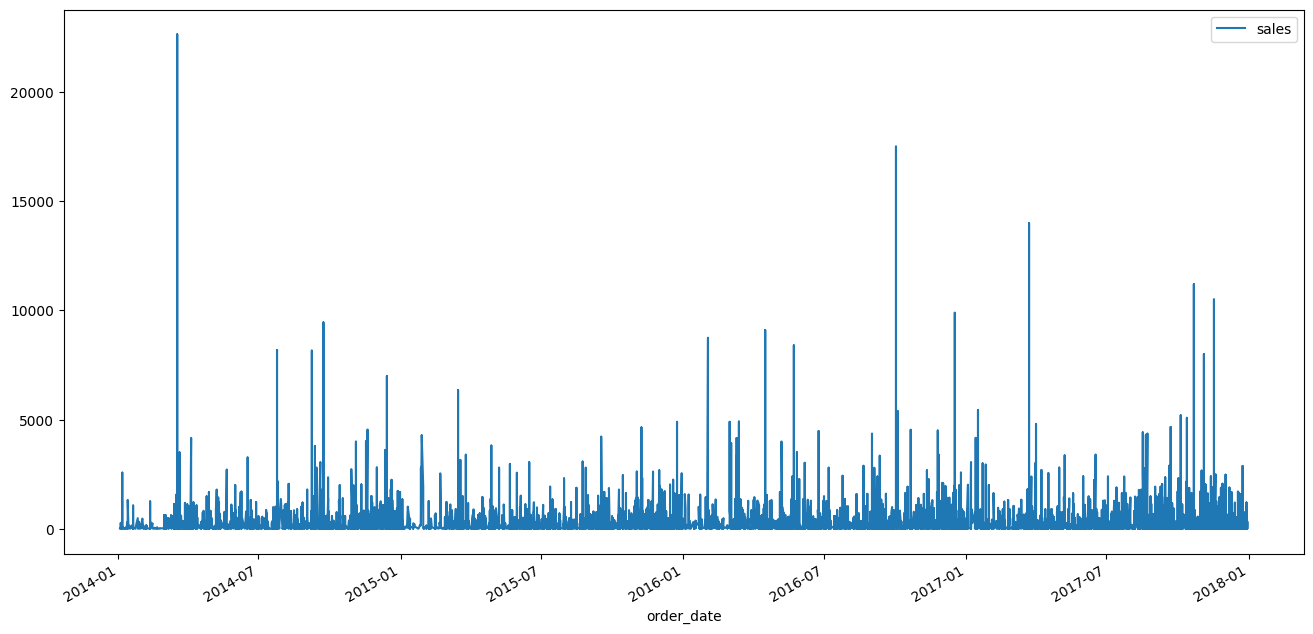

In [18]:
df.plot.line(x='order_date', y = 'sales',figsize=(16,8))

**Insights from above LinePlot**
    
    On 2014-03-18 has more sales 

<Axes: xlabel='ship_mode', ylabel='count'>

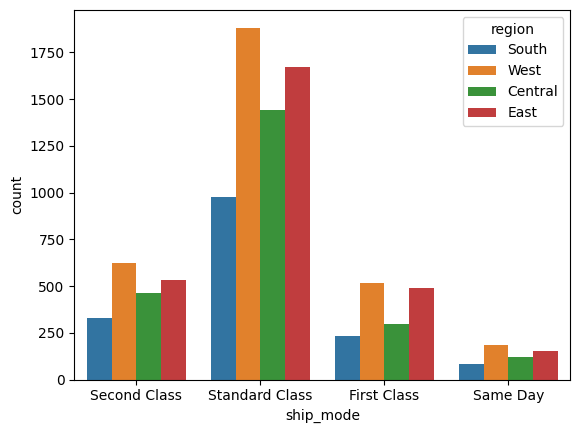

In [36]:
sns.countplot(data = df,x ="ship_mode",hue="region")

In [34]:
pd.crosstab(df["state"],df["ship_mode"])

ship_mode,First Class,Same Day,Second Class,Standard Class
state,,,,
Alabama,9,1,18,33
Arizona,42,16,27,139
Arkansas,10,2,10,38
California,322,119,395,1165
Colorado,44,6,33,99
Connecticut,19,10,11,42
Delaware,18,2,16,60
District of Columbia,0,0,3,7
Florida,54,28,67,234


<Axes: xlabel='sales', ylabel='profit'>

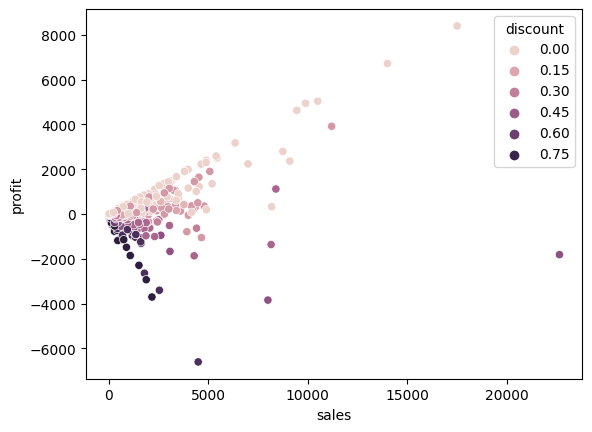

In [40]:
sns.scatterplot(data = df,x="sales",y="profit",hue="discount")

**Insights from the above Scatter plot**
1. Increasing discounts leads to higher losses for above sales

In [43]:
df.corr(numeric_only=True)

,postal_code,sales,quantity,discount,profit
postal_code,1.000000,-0.023851,0.012731,0.058471,-0.029968
sales,-0.023851,1.000000,0.200808,-0.028197,0.479067
quantity,0.012731,0.200808,1.000000,0.008680,0.066241
discount,0.058471,-0.028197,0.008680,1.000000,-0.219481
profit,-0.029968,0.479067,0.066241,-0.219481,1.000000


### Multivariate Analysis

<Axes: >

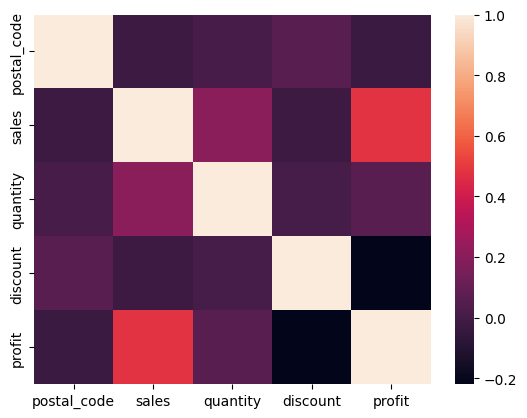

In [45]:
sns.heatmap(df.corr(numeric_only=True))

**Insights from above Heatmap**
1. Relation b/W Sales and Profit is Positively Moderate
